In [1]:
import pickle
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt

In [2]:
with open("data.pkl","rb") as f:
    data = pickle.load( f )

In [3]:
print(data.keys())
jet_feats = data['jet_feats']
trk_feats = data['trk_feats']
label = data['label']
costheta = data['costheta']

dict_keys(['jet_feats', 'trk_feats', 'label', 'costheta'])


In [4]:
jet_eta = jet_feats[:,1]
jet_phi = jet_feats[:,2]

trk_eta = trk_feats[:,:,1]
trk_phi = trk_feats[:,:,2]
trk_origin = trk_feats[:,:,6]
trk_fromDown = trk_feats[:,:,7]

In [5]:
trk_phi = ak.where(trk_phi<0,trk_phi+6.28,trk_phi)

In [6]:
bad1 = jet_phi>4
bad2 = jet_phi<2

In [7]:
mask= ~(bad1 | bad2)

In [8]:
jet_eta = jet_eta[mask]
jet_phi = jet_phi[mask]

trk_eta = trk_eta[mask]
trk_phi = trk_phi[mask]
trk_origin = trk_origin[mask]
trk_fromDown = trk_fromDown[mask]

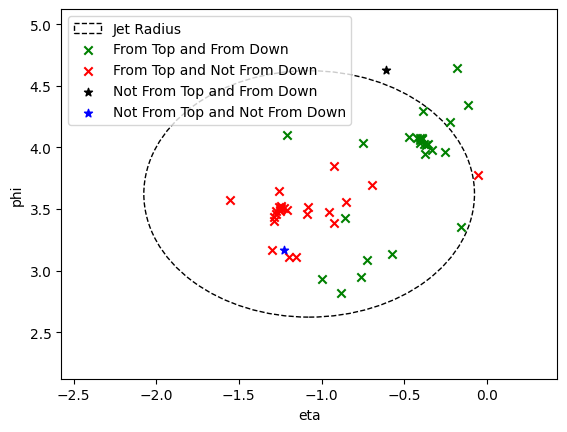

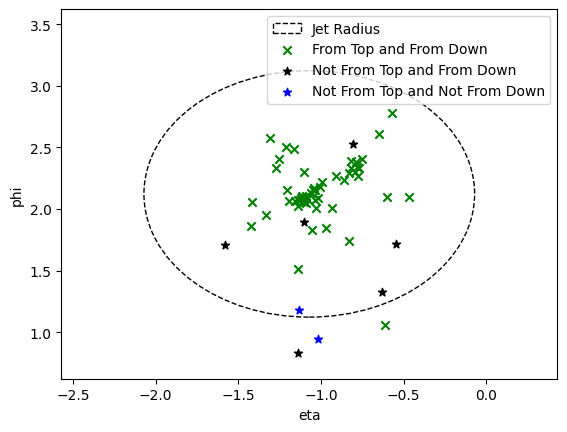

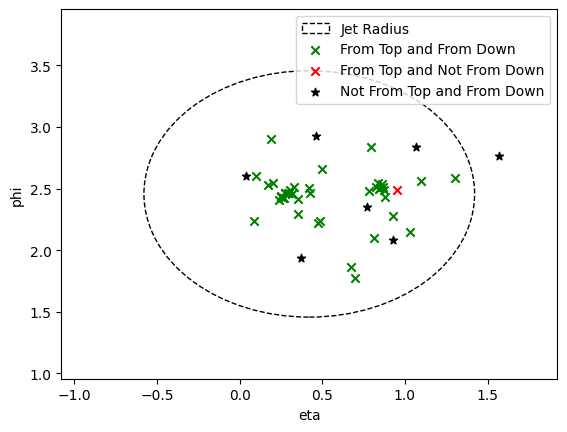

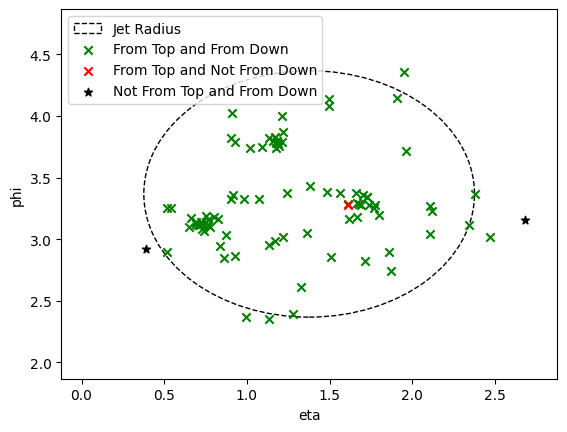

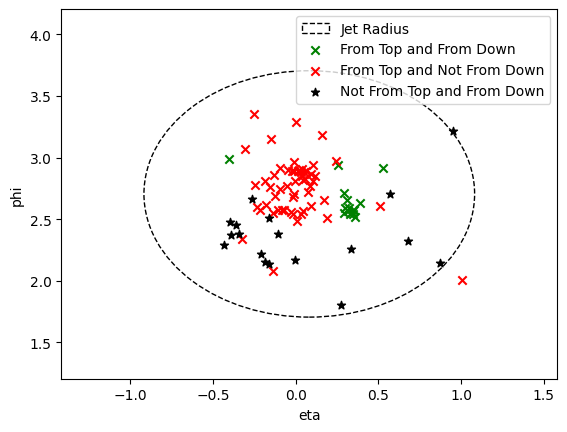

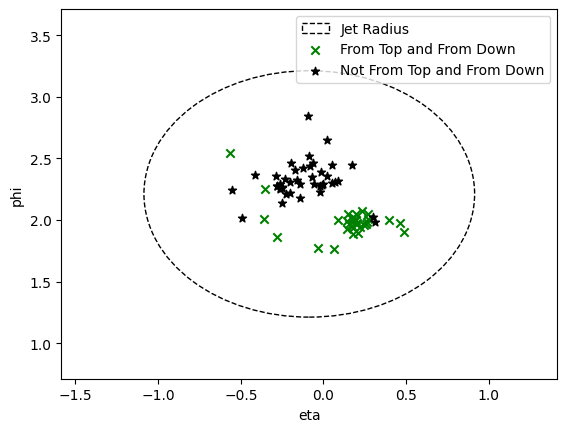

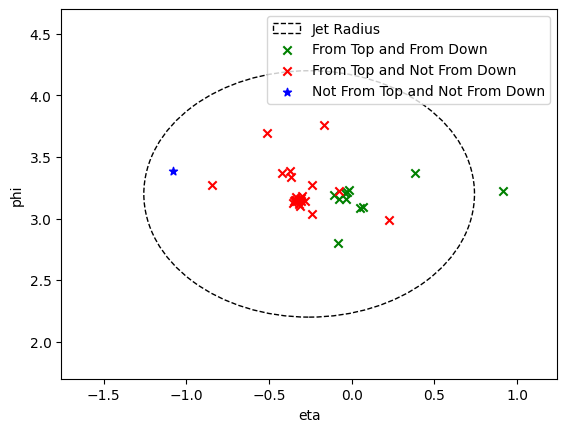

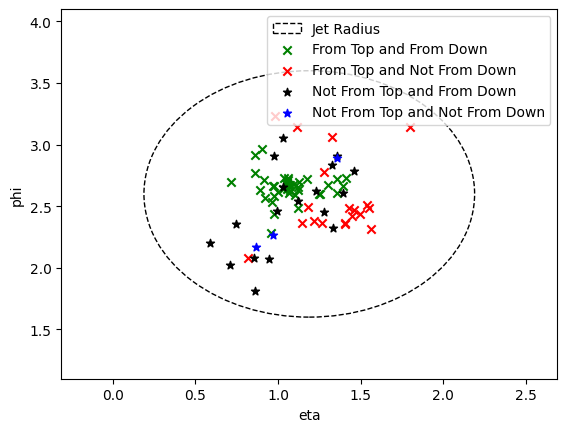

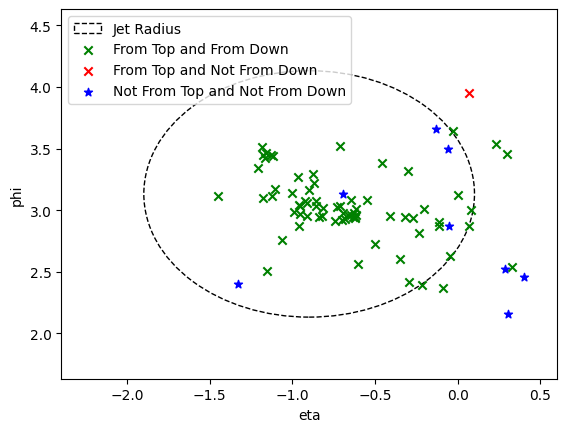

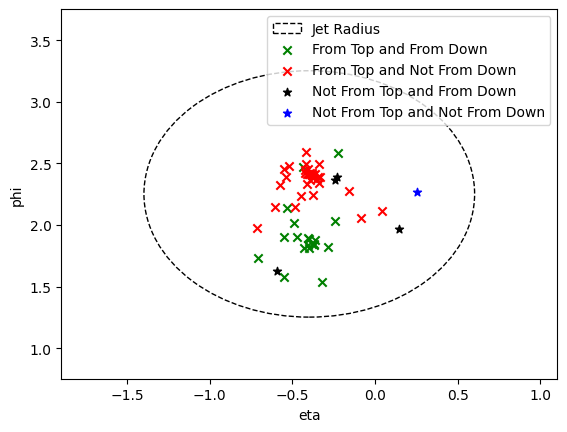

In [14]:
num_events = 10

for i in range(num_events):
    circle1 = plt.Circle((jet_eta[i],jet_phi[i]),1, color='k',linestyle='--',fill=False,label="Jet Radius")

    fig, ax = plt.subplots()
    ax.set_xlim([jet_eta[i]-1.5, jet_eta[i]+1.5])
    ax.set_ylim([jet_phi[i]-1.5, jet_phi[i]+1.5])
    ax.add_patch(circle1)
    
    TT = []
    TF = []
    FT = []
    FF = []
    
    for j in range(len(trk_eta[i])):
        fromTop = abs(trk_origin[i][j])==6 or abs(trk_origin[i][j])==24
        fromDown =abs(trk_fromDown[i][j])==1 or abs(trk_fromDown[i][j])==3
        if fromTop and fromDown: 
            TT.append((trk_eta[i][j], trk_phi[i][j]))
        if fromTop and not fromDown:
            TF.append((trk_eta[i][j], trk_phi[i][j]))
        if not fromTop and fromDown:
            FT.append((trk_eta[i][j], trk_phi[i][j]))
        if not fromTop and not fromDown:
            FF.append((trk_eta[i][j], trk_phi[i][j]))

    TT = np.array(TT)
    TF = np.array(TF)
    FT = np.array(FT)
    FF = np.array(FF)
    if TT.any():        
        plt.scatter(TT[:,0],TT[:,1],color='g',marker='x',label="From Top and From Down")
    if TF.any():
        plt.scatter(TF[:,0],TF[:,1],color='r',marker='x',label="From Top and Not From Down")
    if FT.any():
        plt.scatter(FT[:,0],FT[:,1],color='k',marker='*',label="Not From Top and From Down")
    if FF.any():
        plt.scatter(FF[:,0],FF[:,1],color='b',marker='*',label="Not From Top and Not From Down")
    
    plt.xlabel("eta")
    plt.ylabel("phi")
    plt.legend()
    plt.show()